#  Chapter 6, Part 1

Problems 6.5, 6.6, 6.7, 6.9

## 6.5

In [1]:
#  part a:


#  given: The voltage V+ is time-varying and sinusoidal of the form V+ = x+ *exp(i*ω*t) with x+ a constant.

#  V1 = x1*exp(i*w*t)
#  V2 = x2*exp(i*w*t)
#  V3 = x3*exp(i*w*t)

#  V1, V2, and V3 gives the voltages at point 1, 2, and 3.

#  Kirchoff's law:
#  (V1 - V+)/R1 + C1* d/dt(V1-V2) + V1/R4 = 0

#  V1*( 1/R1 + V1/R4) + C1* d/dt(V1-V2) = V+/R1

#  making substitution of time based V+ :

#  x1*exp(i*w*t) *( 1/R1 + 1/R4) + i*w*C1 *(x1-x2)* exp(i*w*t) = x+/R1 * exp(i*w*t)

#  1st node:               (1/R1 + 1/R4 + i*w*C1) * x1 - i*w*C1*x2 = x+ /R1
#  2nd node: (-i*w*C1*x1)* (1/R2 + 1/R5 + i*w*C2) * x2 - i*w*C2*x3 = x+ /R2
#  3rd node: (-i*w*C2*x2)* (1/R3 + 1/R6 + i*w*C2) * x3             = x+ /R3

In [2]:
# part b:

import numpy as np
import cmath

# given conditions from book
R1 = R3 = R5 = 1000 # ohms
R2 = R4 = R6 = 2000 # ohms
C1 = 1e-6
C2 = 0.5e-6
x_plus = 3 # volts
w = 1000 # s^(-1)


# array from hint in class
A = np.array([[1/R1 + 1/R2 + 1j*w*C1, -1j*w*C1, 0],
             [-1j*w*C1, 1/R2 + 1/R5 + 1j*w*C1 + 1j*w*C2, -1j*w*C2],
             [0, -1j*w*C2, 1/R3 + 1/R6 + 1j*w*C2]], complex)

# loop for nodes 1 to 3
for i in range(3):
    v = [x_plus/R1, x_plus/R2, x_plus/R3]
    x = np.linalg.solve(A,v)
    r, theta = cmath.polar(x[i])
    print(f"V{i + 1}={r:.2f}, phi={theta*180/np.pi:.2f}")

V1=1.70, phi=-5.47
V2=1.48, phi=11.58
V3=1.86, phi=-4.16


## 6.6

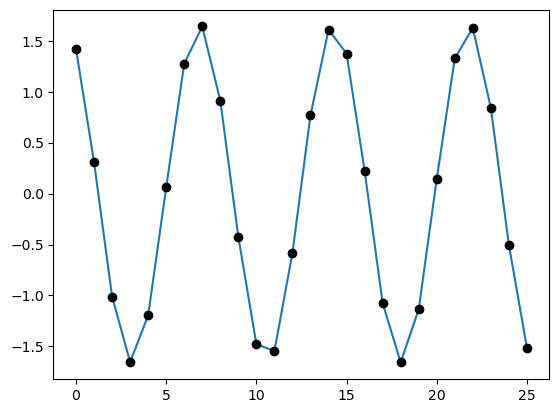

In [3]:
# starting with initial code from book pg 238 springsb.py

from numpy import empty,zeros
from banded import banded
from pylab import plot,show

# Constants
N = 26
C = 1.0
m = 1.0
k = 6.0
omega = 2.0
alpha = 2*k-m*omega*omega

# Set up the initial values of the arrays
A = empty([3,N],float)

# using hint from class
A[0,:] = -k
A[1,:] = alpha
A[2,:] = -k
# unchanged from springsb.py
A[1,0] = alpha - k
A[1,N-1] = alpha - k

v = zeros(N,float)
v[0] = C

# Solve the equations
x = banded(A,v,1,1)

# Make a plot using both dots and lines
plot(x)
plot(x,"ko")
show()

In [ ]:
import vpython as vp

scene = vp.canvas(width=800, height=400, center=vp.vector(0, 0, 0), background=vp.color.white)

spheres = []

for i in range(N):
    sphere = vp.sphere(pos=vp.vector(i - N / 2, 0, 0), radius=0.2, color=vp.color.black)
    spheres.append(sphere)

t = 0
dt = 0.05  # time step

while True:
    vp.rate(50)  # animation rate
    
    for i in range(N):
        sign = (-1) ** i
        spheres[i].pos.x = (i - N / 2) + sign * vp.sin(omega * t) * 0.2  # varying x position on axis

    t += dt
    
# not sure why (think it is banded function issue) 
# but if this is run 6.7b and c will not run, would need 
# to restart kernel to run everything except this.

# there should be animation below, where the dots vary back and forth while every other mass is in sync and 
# masses next to one another are out of sync

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 6.7

In [12]:
# part a:

# Using the equations given in book,
# and using Kirchhoff's law and Ohm's law

# assuming below V1 is V sub 1 and V(N-1) is V sub N-1 etc.

# V1 :
#      (V1 - V+)/R + (V1 - V2)/R + (V1 - V3)/R= 0
#      V1 + V1 - V2 + V1 - V3
#    = 3V1 - V2 - V3 = V+

# V2 :
#      (V2 - V+)/R + (V2 - V1)/R + (V2 - V3)/R + (V2 - V4)/R = 0
#      V2 + V2 - V1 + V2 - V3 + V2 - V4 
#   = -V1 + 4V2 -V3 -V4 = V+

# V3 :
#      (V3 - V1)/R + (V3 - V2)/R + (V3 - V4)/R + (V3 - V5)/R = 0
#     -V1 - V2 + 4V3 - V4 - V5 = 0

# Vi :
#      (Vi - V(i-2)/R + (Vi - V(i-1))/R + (Vi - V(i+1))/R + (Vi - V(i+2))/R = 0
#     -V(i-2) - V(i-2) + 4Vi - V(i+1) - V(i+2) = 0

# V(N-1) :
#      (V(N-1) - V(N-3))/R + (V(N-1) - V(N-2))/R + (V(N-1) - VN)/R = 0
#     -V(N-3) - V(N-2) + 3V(N-1) - VN = 0

# VN :
#      (VN - V(N-2))/R + (VN - V(N-1))/R + (VN - 0)/R = 0
#     -V(N-2) - V(N-1) + 3VN = 0

# Putting in format Av = w

# A = [[3, -1, -1, 0, 0, ...]
#      [-1, 4, -1, -1, 0, ...],
#      [-1, -1, 4, -1, -1, ...],
#      [0, -1, -1, 4, -1, ...],
#      [0, 0, -1, -1, 4, ...],
#      [...]]


# v = [V+, V+, 0, ...]                  # column matrix
# w = [2V+, 3V+, -2V+, -V+, 0, ...]     # column matrix

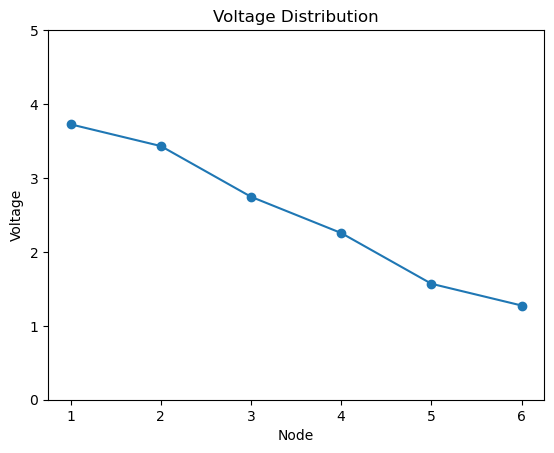

In [13]:
# part b:

from banded import banded
import matplotlib.pyplot as plt

def resistors_matrix(N=6, V_plus=5):
    A = np.zeros((N, N), float)
    set_range = set(range(N))
    for i in range(N):
        value_diagonal = 4 if i not in (0, N-1) else 3
        for j in range(max(0, i-2), min(N, i+3)):
            if j in set_range and i != j:
                A[i, j] = -1
        A[i, i] = value_diagonal

    v = np.zeros(N, float)
    v[:2] = V_plus
    return A, v

V_plus = 5
N = 6
A, v = resistors_matrix(N, V_plus)
x = np.linalg.solve(A,v)

plt.ylim([0,5])
plt.plot(range(1, N+1), x, marker='o', linestyle='-')
plt.xlabel('Node')
plt.ylabel('Voltage')
plt.title('Voltage Distribution')
plt.show()

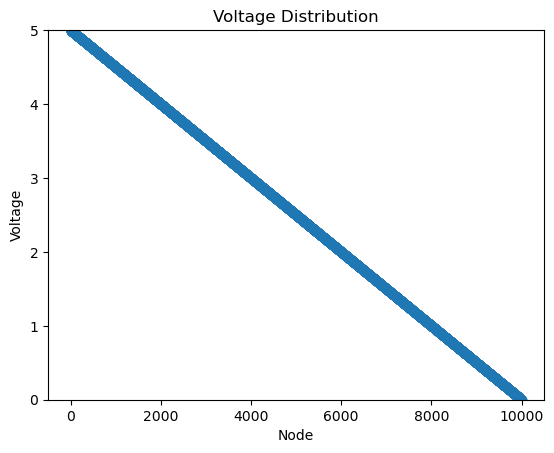

In [14]:
# part c:

V_plus = 5
N = 10000
A, v = resistors_matrix(N, V_plus)

x = np.linalg.solve(A,v)

plt.ylim([0,5])
plt.plot(range(1, N+1), x, marker='o', linestyle='-')
plt.xlabel('Node') # N = 10000 so large x axis
plt.ylabel('Voltage')
plt.title('Voltage Distribution')
plt.show()

## 6.9

In [15]:
# part a:

# starting with the integral, the integral gives L/2 at m=n and 0 otherwise

# applying the Schrodinger eq: Hphi = Ephi:

# thus,

# Integral[(sin(pi*m*x))/ L * Hphi] dx = E * Integral[(sin(pi*m*x))/ L * phi)  dx   # integral is from 0 to L

# defining a matrix H:

# H_mn = 2/L Integral[(sin(pi*m*x))/ L * H * (sin(pi*n*x))/ L] dx                   # integral is from 0 to L

# now writing Schrodinger eq in matrix form:

# Sum[phi_n * Integral[(sin(pi*m*x))/ L * H * (sin(pi*n*x))/ L] dx] = Ephi_m        # integral is from 0 to L
                                                                                    # sum is from n=1 to inf
# rewrite:

# Sum[H_mn * phi_n] = Ephi_m           # sum is from n=1 to inf

# rewrite again:

# Hphi(x) = Ephi(x)


# This shows that solution can be transformed to finding eigenvalues of a Hamiltonian matrix H,
# once eigenvalues are calculated, they represent energy of particle in the well.

In [16]:
# part b:

import numpy as np

hbar = 1.0545718e-34  # constant
M = 9.1094e-31    # mass of electron (kg)
a = 1.6022e-18      # 10 eV to Joules
L = 5e-10             # width

# conditions given by book
def H_mn(m, n, L):
    if m != n and (m % 2 == 0 and n % 2 == 0) or (m % 2 != 0 and n % 2 != 0):
        return 0
    elif m != n and (m % 2 == 0 or n % 2 == 0):
        return -(2*L/np.pi)**2 * (m*n/(m**2 - n**2)** 2)
    else:
        return L ** 2 / 4

# for arbitrary m and n
m = 3
n = 2
result = H_mn(m, n, L)
print(f'H_{m}{n} = {result}')


H_32 = -2.431708407416107e-20


In [17]:
# part c:
# just copy pasting from part b and adding:

import numpy as np

hbar = 1.0545718e-34  # constant
M = 9.1094e-31    # mass of electron (kg)
a = 1.6022e-18      # 10 eV to Joules
charge_electron = 1.6022e-19 # eV
L = 5e-10             # width

# conditions given by book
def H_mn(m, n, L):
    if m != n and (m % 2 == 0 and n % 2 == 0) or (m % 2 != 0 and n % 2 != 0):
        return 0
    elif m != n:
        return -(2*L/np.pi)**2 * (m*n/(m**2 - n**2)** 2)
    else:
        return L**2/4

H = np.zeros((10, 10)) # making array

for m in range(1, 11): 
    for n in range(1, 11):
        H[m-1, n-1] = H_mn(m, n, L)

eigenvalues, _ = np.linalg.eig(H)

eigenvalues_ev = eigenvalues / charge_electron

print("First ten energy levels:")
for i in range(10):
    print(f"Level {i+1}: {eigenvalues_ev[i]} eV")
    
# not getting the 5.84 eV as problem says for ground state, some error

First ten energy levels:
Level 1: -0.12493901841923831 eV
Level 2: -0.18504134548322854 eV
Level 3: -0.07113942470466131 eV
Level 4: -0.028226623136068666 eV
Level 5: -0.003334102321566888 eV
Level 6: 0.5751299736195409 eV
Level 7: 0.5150276465555506 eV
Level 8: 0.4612280528409742 eV
Level 9: 0.3934227304578797 eV
Level 10: 0.4183152512723812 eV


In [18]:
# part d:
# just part c code with changed array size:

import numpy as np

hbar = 1.0545718e-34  # constant
M = 9.1094e-31    # mass of electron (kg)
a = 1.6022e-18      # 10 eV to Joules
charge_electron = 1.6022e-19 # eV
L = 5e-10             # width

# conditions given by book
def H_mn(m, n, L):
    if m != n and (m % 2 == 0 and n % 2 == 0) or (m % 2 != 0 and n % 2 != 0):
        return 0
    elif m != n:
        return -(2*L/np.pi)**2 * (m*n/(m**2 - n**2)** 2)
    else:
        return L**2/4

H = np.zeros((100, 100)) # making array

for m in range(1, 101): 
    for n in range(1, 101):
        H[m-1, n-1] = H_mn(m, n, L)

eigenvalues, _ = np.linalg.eig(H)

eigenvalues_ev = eigenvalues / charge_electron

print("First ten energy levels:")
for i in range(10):
    print(f"Level {i+1}: {eigenvalues_ev[i]} eV")

# accuracy of the calculation would be good given 100x100 array but some error in part c propagates to this part.

First ten energy levels:
Level 1: -0.228140896610589 eV
Level 2: -0.23502206285114377 eV
Level 3: -0.22128293084961448 eV
Level 4: -0.2144556903420875 eV
Level 5: -0.20766160331902453 eV
Level 6: -0.20090257542313608 eV
Level 7: -0.19418048273167665 eV
Level 8: -0.18749727714009068 eV
Level 9: -0.18085502189920516 eV
Level 10: -0.17425590990286136 eV


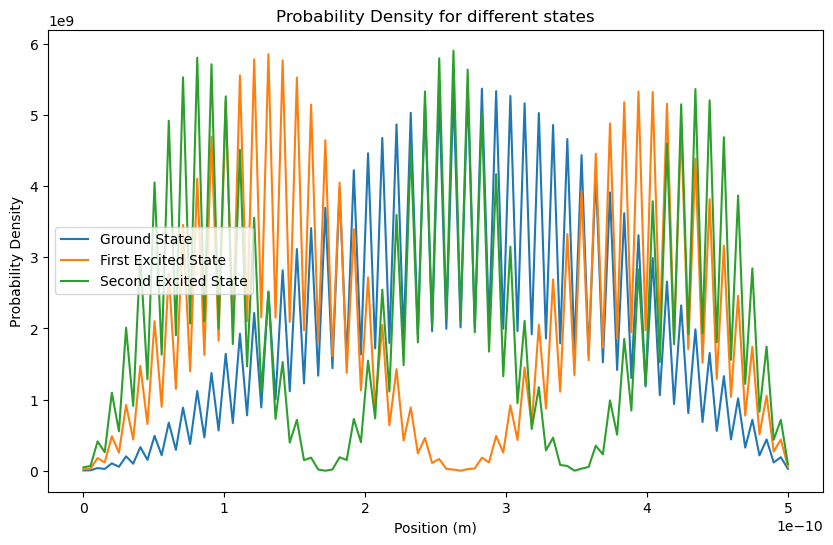

In [19]:
# part e:
# modyfing part d code:


import numpy as np
import matplotlib.pyplot as plt

hbar = 1.0545718e-34  # constant
M = 9.1094e-31    # mass of electron (kg)
a = 1.6022e-18      # 10 eV to Joules
charge_electron = 1.6022e-19 # eV
L = 5e-10             # width

# conditions given by book
def H_mn(m, n, L):
    if m != n and (m % 2 == 0 and n % 2 == 0) or (m % 2 != 0 and n % 2 != 0):
        return 0
    elif m != n:
        return -(2*L/np.pi)**2 * (m*n/(m**2 - n**2)** 2)
    else:
        return L**2/4

def psi_n(x, n, L):
    return np.sqrt(2/L) * np.sin(n * np.pi * x / L)

H = np.zeros((100, 100)) # making array

for m in range(1, 101): 
    for n in range(1, 101):
        H[m-1, n-1] = H_mn(m, n, L)

eigenvalues, eigenvectors = np.linalg.eig(H)

# sort eigenvalues and eigenvectors
idx = eigenvalues.argsort()
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

ground_state = eigenvectors[:, 0]
first_excited_state = eigenvectors[:, 1]
second_excited_state = eigenvectors[:, 2]

normalize_ground = np.sqrt(np.trapz(np.abs(ground_state)**2, dx=L/100))   # normalizing checking factors
normalize_first = np.sqrt(np.trapz(np.abs(first_excited_state)**2, dx=L/100))
normalize_second = np.sqrt(np.trapz(np.abs(second_excited_state)**2, dx=L/100))

ground_normalized = ground_state / normalize_ground # normalized excited states
first_normalized = first_excited_state / normalize_first
second_normalized = second_excited_state / normalize_second

x_values = np.linspace(0, L, 100)

prob_density_ground = np.abs(ground_normalized)**2  # calculate probability densities then check normalization
prob_density_first = np.abs(first_normalized)**2
prob_density_second = np.abs(second_normalized)**2

plt.figure(figsize=(10, 6))
plt.plot(x_values, prob_density_ground, label="Ground State")
plt.plot(x_values, prob_density_first, label="First Excited State")
plt.plot(x_values, prob_density_second, label="Second Excited State")
plt.xlabel('Position (m)')
plt.ylabel('Probability Density')
plt.title('Probability Density for different states')
plt.legend()
plt.show()

# after calculating the probability densities for the ground, first excited and second excited states,
# the normalization is checked to verify if integral equals 1, so this should be true for the wavefunction.